# Data Prep and Visualization in Python

In this project, we'll work through munging a data set and creating visualizations related to trends in the airline industry in the middle of the last century. You'll get started using [MatPlotLib](https://matplotlib.org/), a very powerful and popular plotting library in Python that is covered in this week's course materials.

In [1]:
# Install the pydataset package. This package gives us data sets to work with very easily
! pip install pydataset

     |████████████████████████████████| 15.9 MB 108 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=cb7d508c4e1a9a2bef858c994bbdbed6e97b04fe789bab516f993d18b1624e84
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [2]:
# The convention for importing matplotlib with an alias is "plt". We'll also need pandas and numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The Air Passengers Dataset

This dataset shows the number of passengers flying United States airlines by month from 1949-1960. Your job is to do various data munging operations on this dataset to clean it up and prepare it for several visualizations. You will then determine what code is needed to generate those visualizations.

In [3]:
from pydataset import data

passengers = data('AirPassengers')

initiated datasets repo at: /root/.pydataset/


Ugh. When we examine the head of this datset, we can see that the years are in decimal form rather than month and year. We'll need to change that before we can do our analysis.

NOTE: The times are represented by twelfths. i.e. 1949.00000 = 149 0/12 (January). 1949.083333 = 1949 1/12 (February), and so on.

In [4]:
passengers.head(12)

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


In [5]:
x = passengers['time'].astype(str).str.split(".")
print(x)


1                  [1949, 0]
2        [1949, 08333333333]
3        [1949, 16666666667]
4                 [1949, 25]
5        [1949, 33333333333]
6        [1949, 41666666667]
7                  [1949, 5]
8        [1949, 58333333333]
9        [1949, 66666666667]
10                [1949, 75]
11       [1949, 83333333333]
12       [1949, 91666666667]
13                 [1950, 0]
14       [1950, 08333333333]
15       [1950, 16666666667]
16                [1950, 25]
17       [1950, 33333333333]
18       [1950, 41666666667]
19                 [1950, 5]
20       [1950, 58333333333]
21       [1950, 66666666667]
22                [1950, 75]
23       [1950, 83333333333]
24       [1950, 91666666667]
25                 [1951, 0]
26       [1951, 08333333333]
27       [1951, 16666666667]
28                [1951, 25]
29       [1951, 33333333333]
30       [1951, 41666666667]
31                 [1951, 5]
32       [1951, 58333333333]
33       [1951, 66666666667]
34                [1951, 75]
35       [1951

## The decimal years complicate the EDA work

We need to deal with this by making explicit month and year columns. It is common to have to reformat columns like this in a dataframe

## #1 Add a 'year' column to passengers that reflects the current year

In [6]:
# TODO
passengers['Year'] =passengers['time'].apply(lambda x: str(x).split('.')[0])
passengers['Year'] = passengers['Year'].astype(float)
print(passengers)


            time  AirPassengers    Year
1    1949.000000            112  1949.0
2    1949.083333            118  1949.0
3    1949.166667            132  1949.0
4    1949.250000            129  1949.0
5    1949.333333            121  1949.0
6    1949.416667            135  1949.0
7    1949.500000            148  1949.0
8    1949.583333            148  1949.0
9    1949.666667            136  1949.0
10   1949.750000            119  1949.0
11   1949.833333            104  1949.0
12   1949.916667            118  1949.0
13   1950.000000            115  1950.0
14   1950.083333            126  1950.0
15   1950.166667            141  1950.0
16   1950.250000            135  1950.0
17   1950.333333            125  1950.0
18   1950.416667            149  1950.0
19   1950.500000            170  1950.0
20   1950.583333            170  1950.0
21   1950.666667            158  1950.0
22   1950.750000            133  1950.0
23   1950.833333            114  1950.0
24   1950.916667            140  1950.0


## #2 Add a "month" column

Set this up in such a way that January is represented with a 1, February with a 2, etc.

*Hint: Create a column in `passengers` with a 2-digit decimal equivalent (after the dot). This column will repeat values every 12 rows. If we know what month each value in this column maps to, can we get our desired `month` column via some dataframe operation using this column?*

In [7]:
# TODO
passengers['Month'] = passengers['time'].apply(lambda x: int(round(x%1 * 12, 0) + 1))
passengers['Month'] = passengers['Month'].astype(float)
print(passengers)
#passengers["month"] = round((passengers.time - passengers.year)*12 + 1).astype(int)

            time  AirPassengers    Year  Month
1    1949.000000            112  1949.0    1.0
2    1949.083333            118  1949.0    2.0
3    1949.166667            132  1949.0    3.0
4    1949.250000            129  1949.0    4.0
5    1949.333333            121  1949.0    5.0
6    1949.416667            135  1949.0    6.0
7    1949.500000            148  1949.0    7.0
8    1949.583333            148  1949.0    8.0
9    1949.666667            136  1949.0    9.0
10   1949.750000            119  1949.0   10.0
11   1949.833333            104  1949.0   11.0
12   1949.916667            118  1949.0   12.0
13   1950.000000            115  1950.0    1.0
14   1950.083333            126  1950.0    2.0
15   1950.166667            141  1950.0    3.0
16   1950.250000            135  1950.0    4.0
17   1950.333333            125  1950.0    5.0
18   1950.416667            149  1950.0    6.0
19   1950.500000            170  1950.0    7.0
20   1950.583333            170  1950.0    8.0
21   1950.666

## #3 Generate the plot below of passengers vs. time using each monthly count

<a href='https://drive.google.com/file/d/1PdaXbkCVzUXBnUP6c6cLP3nZ94ShSLg1/view?usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/7EHckqyjefS7rN8-gAtj2SgSyKfV3wlTnGKqCwzOf85F6NYlqYQbz7bDfWw=w2400' /></a>

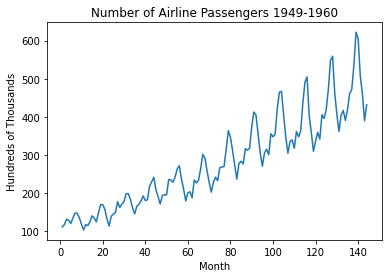

In [8]:
# TODO
plt.plot(passengers['AirPassengers'])
plt.title('Number of Airline Passengers 1949-1960')
plt.xlabel('Month')
plt.ylabel('Hundreds of Thousands')
plt.show()

## #4 Generate the plot below of passengers vs. time using an annual count

<a href='https://drive.google.com/file/d/19WYHQR7sFgaeN5ZHlwx5x1-o-wxJ4weW/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/2gbHNgm8UhbCEevaUBpMUSvVgk_6QuxMASqn9-wK1NdzrDXrcF-VIWK_o08=w2400' /></a>

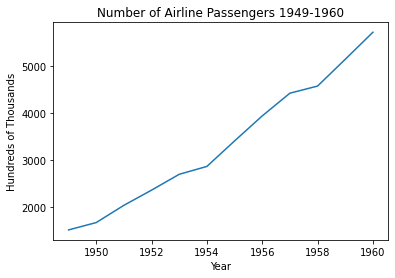

In [12]:
# TODO
passengers_year = passengers.groupby('Year').sum()[['AirPassengers']]
plt.plot(passengers_year['AirPassengers'])
plt.title('Number of Airline Passengers 1949-1960')
plt.xlabel('Year')
plt.ylabel('Hundreds of Thousands')

plt.show()

#temp=passengers.groupby(['Year'])['AirPassengers'].sum().reset_index()

#plt.figure(figsize=(8,6))
#plt.bar(temp['Year'],temp['AirPassengers'])
#plt.xlabel("Year", size=14)
#plt.ylabel("Hundreds of thousands", size=14)

#plt.ylim([0, 6000])

#plt.title("plot with Matplotlib")


## #5 Generate the barplot below of passengers by year

<a href='https://drive.google.com/file/d/1-4NF40zvVhwi6RWagJu98BaBuDNOXaEd/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/IQRk35KApDIxYtHGH3WoczLnCvHCRdMNlHw64rgLWPYUostOoAn2hxp8lZA=w2400' /></a>

Text(0, 0.5, 'Hundreds of Thousands')

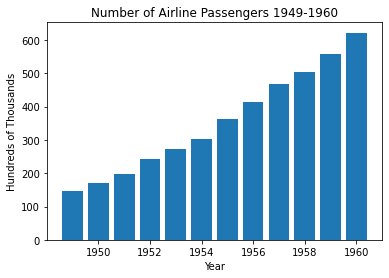

In [ ]:
# TODO
plt.bar(passengers['Year'], passengers['AirPassengers'])
plt.title('Number of Airline Passengers 1949-1960')
plt.xlabel('Year')
plt.ylabel('Hundreds of Thousands')

## #6 Generate the histogram below of monthly passengers

**Additional requirements:**

* Only include 1955 and beyond
* Use a binwidth of 50, a min of 200, and a max of 700
* Set the yticks to start at 0, end at 25 by interval of 5

<a href='https://drive.google.com/file/d/1mEtvUbnh2LcDDc73LNr_qX984HzgyhiQ/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/7I2FzRPSQPyoalFcwH3vTDeB9Gf80OUlaZOs1x9oRRYyQLlHXPU9H-NhSVQ=w2400' /></a>

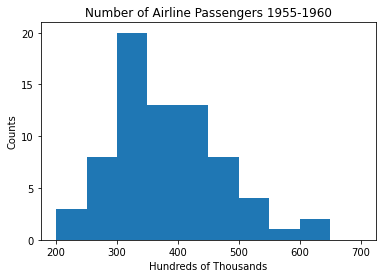

In [13]:
# TODO
passengers1 = passengers[passengers['Year']>=1955]

plt.hist(passengers1['AirPassengers'], range=(200,700), rwidth=50)
plt.title('Number of Airline Passengers 1955-1960')
plt.xlabel('Hundreds of Thousands')
plt.ylabel('Counts')
plt.yticks(list(range(0,25,5)))
plt.show()

## #7 Generate the histogram below of monthly passengers

**Additional requirements:**

* Generate two groups to compare. Group 1 should be the years 1949-1950. Group 2 should be the years 1959-60.
* Binwidth of 50 from 100 to 700
* yticks from 0 to 24, spaced by 2
* Be sure to include a legend

<a href='https://drive.google.com/file/d/1gqJbBVOPIurYikUIDpXoAF3gZx2p8lUA/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/Ok91nFY8Srjn1FpVwOil9ycH9y6isZejTqi7hifqaEA5E3tWpkwldWVLo3U=w2400' /></a>

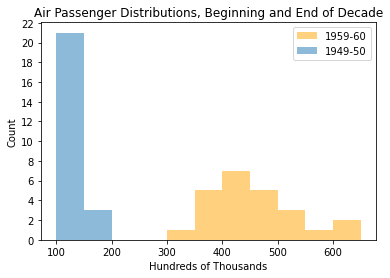

In [15]:
# TODO
passengers4950 = passengers[passengers['Year']<=1950]
passengers5960 = passengers[passengers['Year']>=1959]

bin = np.arange(100,700,50)
ytick = np.arange(0,24,2)

plt.hist(passengers5960['AirPassengers'], bin, alpha = .5, color='orange', label='1959-60')
plt.hist(passengers4950['AirPassengers'], bin, alpha = .5, label='1949-50')
plt.legend(loc='upper right')
plt.yticks(ytick)
plt.title('Air Passenger Distributions, Beginning and End of Decade')
plt.xlabel('Hundreds of Thousands')
plt.ylabel('Count')
plt.legend()
plt.show()


## #8 Generate the time plot below

**Additional requirements:**

* Compare 1950, 1955, and 1960 by month

<a href='https://drive.google.com/file/d/11nVH5EiYxxtJ48isS9VLtwLIjn0hALXV/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/SKfWqBE324A__VS8V-TBqMQXHWE9OUjVoJyeyJME8uJzyfWS73aaCms7A3c=w2400' /></a>

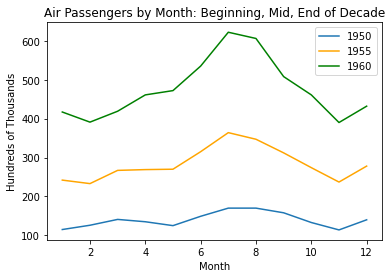

In [ ]:
# TODO
passengers1950 = passengers[passengers['Year']==1950]
passengers1955 = passengers[passengers['Year']==1955]
passengers1960 = passengers[passengers['Year']==1960]


plt.plot('Month', 'AirPassengers', data = passengers1950, label=str('1950'))
plt.plot('Month', 'AirPassengers', data = passengers1955, color='orange', label=str('1955'))
plt.plot('Month', 'AirPassengers', data = passengers1960, color='green', label=str('1960'))
plt.xlabel('Month')
plt.ylabel('Hundreds of Thousands')
plt.title('Air Passengers by Month: Beginning, Mid, End of Decade')
plt.legend()

## #9  Understand your data and tell a story

* Which of these plots would you create first to explore your data before building a model or performing an analysis? Why?
* If you could only use one of these plots to tell a story about air travel trends mid-centry, which would you use and why? What are some insights you could share?


In [ ]:
# TODO

For this data set I would begin with the line graph in question 3.  Since we are dealing with time, we need to see how the data behaves over time.  The most probable analysis we would apply to this dataset would be a time series analysis, so it is important to examine seasonality and over-time trends in the data. 

To explain mid-century airtravel trends, I would use the line plot/graphs in number 8.  We can see the seasonality with an increased number of travelers in July/August, with a decrease in travel around the beginning and end of the year. Another great visual this graph provides to the reader is the commanding increase of traffic overall as time progresses.  We can truly see that Air Travel is gaining popularity during this time period, but the seasonality remains if not becoming more apparent.